# Análise de dados do Enem 2019



In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
enem2019 = pd.read_csv('MICRODADOS_ENEM_2019.csv',sep=';',encoding='ISO-8859-1')

In [19]:
enem2019.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


In [27]:
# setamos uma varaivel para contar as quantidades de estudantes por estados
qtd_por_estado = enem2019['SG_UF_RESIDENCIA'].value_counts()
print(qtd_por_estado) 

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64


<AxesSubplot:>

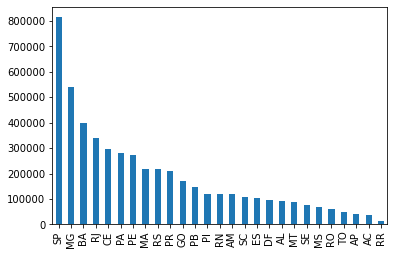

In [40]:
enem2019['SG_UF_RESIDENCIA'].value_counts().plot.bar()

In [86]:
#setamos uma variavel para contar as idades dos participantes do enem
enem2019['NU_IDADE'].value_counts()

18.0    864186
17.0    847303
19.0    577161
20.0    409385
16.0    316437
         ...  
91.0         2
92.0         1
87.0         1
88.0         1
94.0         1
Name: NU_IDADE, Length: 82, dtype: int64

In [89]:
#quantos parcitipantes do enem
enem2019['NU_IDADE'].count()

5095201

In [88]:
#media de idade dos partcipantes
enem2019['NU_IDADE'].mean()

22.08764325489809

277468

<AxesSubplot:ylabel='Frequency'>

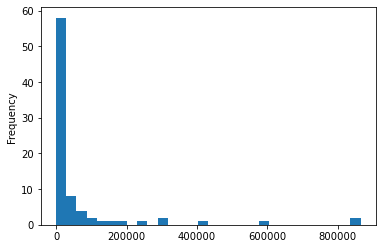

In [37]:
enem2019['NU_IDADE'].value_counts().plot.hist(bins=30)

In [51]:
#achando a quantidade de mulheres gravidas no enem
total_gestantes = enem2019['IN_GESTANTE'].value_counts()
print(total_gestantes)

0    5093860
1       1410
Name: IN_GESTANTE, dtype: int64


In [52]:
esta_gravida = total_gestantes[1]
print(esta_gravida)

1410


In [49]:
# verificando a quantidade de mulheres no enem
td_mulheres = enem2019['TP_SEXO'].value_counts()
print(qtd_mulheres)

F    3031822
M    2063448
Name: TP_SEXO, dtype: int64


In [50]:
sexofemimino = qtd_mulheres[0]
print(sexofemimino)

3031822


In [54]:
# percentual de mulheres gravidas 0.00046%
percent_gravidas = esta_gravida / sexofemimino
print(percent_gravidas)

0.00046506688057544273


In [57]:
percent_nao_gravidas = 100 - percent_gravidas
print(percent_nao_gravidas)

99.99953493311942


In [71]:
colunas_selecionadas = enem2019[['TP_SEXO', 'NU_NOTA_REDACAO']]


In [ ]:
colunas_selecionadas = enem2019[['TP_SEXO', 'NU_NOTA_REDACAO']]

In [72]:
notas_sexo = enem2019.filter(items=colunas_selecionadas)
print(notas_sexo)

        TP_SEXO  NU_NOTA_REDACAO
0             M              NaN
1             M              NaN
2             F              NaN
3             F            460.0
4             F            860.0
...         ...              ...
5095265       F              NaN
5095266       M            500.0
5095267       M              NaN
5095268       M              NaN
5095269       F              NaN

[5095270 rows x 2 columns]


In [73]:
notas_sexo.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,M,NaN
2,F,NaN
3,F,460.0
4,F,860.0


In [75]:
nota_sexo_sem_na = notas_sexo.dropna()

In [93]:
nota_sexo_sem_na.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

In [97]:
nota_sexo_sem_na.groupby('TP_SEXO').max().value_counts()

NU_NOTA_REDACAO
0.0                2
dtype: int64

TP_SEXO
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

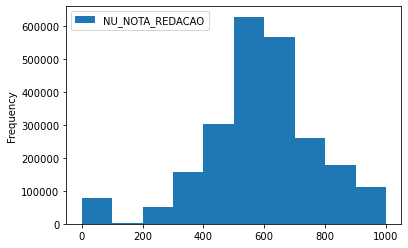

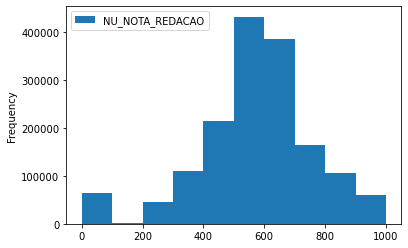

In [81]:
nota_sexo_sem_na.groupby('TP_SEXO').plot.hist()

In [84]:
enem2019['NU_IDADE'].min()
enem2019['NU_IDADE'].max()

94.0